In [1]:
from sktime.datasets import load_longley
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [2]:
# List of models to forecast, Grandient Boosting
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [3]:
arch_list = [
    (
        LinearRegression,
        {"init_args": {}, "hyper_parameters": {"n_jobs": [-1]}},
    ),
    (
        DecisionTreeRegressor,
        {
            "init_args": {"criterion": "friedman_mse", "max_depth": 3},
            "hyper_parameters": {"criterion": ["friedman_mse"], "max_depth": [2, 3, 4]},
        },
    ),
    (
        RandomForestRegressor,
        {
            "init_args": {
                "criterion": "friedman_mse",
                "max_features": 0.6,
                "min_samples_split": 30,
                "max_depth": 6,
            },
            "hyper_parameters": {
                "criterion": ["friedman_mse"],
                "max_features": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                "min_samples_split": [10, 20, 30, 40, 50],
                "max_depth": [4, 6, 8, 10, 12],
            },
        },
    ),
    (
        ExtraTreeRegressor,
        {
            "init_args": {
                "criterion": "friedman_mse",
                "max_features": 0.6,
                "min_samples_split": 30,
                "max_depth": 6,
            },
            "hyper_parameters": {
                "criterion": ["friedman_mse"],
                "max_features": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                "min_samples_split": [10, 20, 30, 40, 50],
                "max_depth": [4, 6, 8, 10, 12],
            },
        },
    ),
    (
        XGBRegressor,
        {
            "init_args": {
                "eta": 0.1,
                "max_depth": 4,
                "min_child_weight": 1,
                "subsample": 1.0,
                "colsample_bytree": 1.0,
            },
            "hyper_parameters": {
                "eta": [0.05, 0.075, 0.1, 0.15],
                "max_depth": [1, 2, 3, 4],
                "min_child_weight": [2, 4, 6, 10],
                "subsample": [0.3, 0.5, 0.7, 1.0],
                "colsample_bytree": [0.3, 0.6, 1.0],
            },
        },
    ),
]

In [4]:
# metrics
from sklearn.model_selection import TimeSeriesSplit
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

from automl.launch_strategy import simple_strategy
from automl.optimize_strategy import optimize_strategy

metrics = [
    (mean_absolute_percentage_error, {"name": "MAPE"})
]

strategies = [
    (
        simple_strategy,
        {"args": {"split_method": TimeSeriesSplit(n_splits=3)}}
    ),
    (
        optimize_strategy,
        {"args": {"shuffle": False, "target": "MAPE"}}
    )
]

In [5]:
y_data, x_data = load_longley()

In [78]:
x_data

,GNPDEFL,GNP,UNEMP,ARMED,POP
Period,,,,,
1947,83.0,234289.0,2356.0,1590.0,107608.0
1948,88.5,259426.0,2325.0,1456.0,108632.0
1949,88.2,258054.0,3682.0,1616.0,109773.0
1950,89.5,284599.0,3351.0,1650.0,110929.0
1951,96.2,328975.0,2099.0,3099.0,112075.0
1952,98.1,346999.0,1932.0,3594.0,113270.0
1953,99.0,365385.0,1870.0,3547.0,115094.0
1954,100.0,363112.0,3578.0,3350.0,116219.0
1955,101.2,397469.0,2904.0,3048.0,117388.0


In [6]:
import numpy as np

x_data.to_numpy()[np.array([0, 1, 2, 3])]

array([[8.30000e+01, 2.34289e+05, 2.35600e+03, 1.59000e+03, 1.07608e+05],
       [8.85000e+01, 2.59426e+05, 2.32500e+03, 1.45600e+03, 1.08632e+05],
       [8.82000e+01, 2.58054e+05, 3.68200e+03, 1.61600e+03, 1.09773e+05],
       [8.95000e+01, 2.84599e+05, 3.35100e+03, 1.65000e+03, 1.10929e+05]])

In [7]:
from automl.core import auto_ml

result = auto_ml(
    x_data.to_numpy(),
    y_data.to_numpy(),
    arch_list,
    metrics,
    strategies,
)

Split indexes: [(array([0, 1, 2, 3]), array([4, 5, 6, 7])), (array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 8,  9, 10, 11])), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([12, 13, 14, 15]))]
Running on model: LinearRegression
{'model': 'LinearRegression', 'params': {'n_jobs': -1}, 'MAPE': 0.013992525066871002} 

Running on model: DecisionTreeRegressor
{'model': 'DecisionTreeRegressor', 'params': {'criterion': 'friedman_mse', 'max_depth': 3}, 'MAPE': 0.03924796949748199} 

Running on model: RandomForestRegressor
{'model': 'RandomForestRegressor', 'params': {'criterion': 'friedman_mse', 'max_features': 0.6, 'min_samples_split': 30, 'max_depth': 6}, 'MAPE': 0.07356109948607961} 

Running on model: ExtraTreeRegressor
{'model': 'ExtraTreeRegressor', 'params': {'criterion': 'friedman_mse', 'max_features': 0.6, 'min_samples_split': 30, 'max_depth': 6}, 'MAPE': 0.07272947779653575} 

Running on model: XGBRegressor
{'model': 'XGBRegressor', 'params': {'eta': 0.1, 'max_depth': 4, 'm

[I 2024-02-16 12:02:38,829] A new study created in memory with name: no-name-8ddf1c85-0eac-4337-b710-3c8be0a15abd
[I 2024-02-16 12:02:38,840] Trial 0 finished with value: 0.02268476212056346 and parameters: {'n_jobs': -1}. Best is trial 0 with value: 0.02268476212056346.


Metric MAPE: 0.02268476212056346


Could not read Jupyter Notebook: No module named 'nbconvert'


ClearML Task: created new task id=5af6995e6d29425098fe4421fe1b6cd4
ClearML results page: http://ia-stack.tri.lan/projects/a8b29f5762ad43c1992a80d3bb2843f4/experiments/5af6995e6d29425098fe4421fe1b6cd4/output/log


[I 2024-02-16 12:02:51,411] A new study created in memory with name: no-name-736d44d9-0ed3-4b2c-b483-42e2383a350f
[I 2024-02-16 12:02:51,436] Trial 0 finished with value: 0.029747462456150703 and parameters: {'criterion': 'friedman_mse', 'max_depth': 2}. Best is trial 0 with value: 0.029747462456150703.
[I 2024-02-16 12:02:51,449] Trial 1 finished with value: 0.027741371214812256 and parameters: {'criterion': 'friedman_mse', 'max_depth': 4}. Best is trial 1 with value: 0.027741371214812256.
[I 2024-02-16 12:02:51,472] Trial 2 finished with value: 0.03200892200482715 and parameters: {'criterion': 'friedman_mse', 'max_depth': 3}. Best is trial 1 with value: 0.027741371214812256.


Metric MAPE: 0.029747462456150703
Metric MAPE: 0.027741371214812256
Metric MAPE: 0.03200892200482715


Could not read Jupyter Notebook: No module named 'nbconvert'


ClearML Task: created new task id=f0d00896912f45bcb36d74ce92bd42ee
ClearML results page: http://ia-stack.tri.lan/projects/a8b29f5762ad43c1992a80d3bb2843f4/experiments/f0d00896912f45bcb36d74ce92bd42ee/output/log


[I 2024-02-16 12:03:04,198] A new study created in memory with name: no-name-18906788-c88a-4b28-8b10-def8d4b2ebbb
[I 2024-02-16 12:03:04,325] Trial 0 finished with value: 0.09135957191847287 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 0 with value: 0.09135957191847287.
[I 2024-02-16 12:03:04,349] Trial 1 finished with value: 0.06405752948712469 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 1 with value: 0.06405752948712469.
[I 2024-02-16 12:03:04,382] Trial 2 finished with value: 0.0861310566020338 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 1 with value: 0.06405752948712469.
[I 2024-02-16 12:03:04,415] Trial 3 finished with value: 0.039468934413263164 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.7, 'c

Metric MAPE: 0.09135957191847287
Metric MAPE: 0.06405752948712469
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.039468934413263164
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.037615744717953405


[I 2024-02-16 12:03:04,529] Trial 6 finished with value: 0.08671392512979498 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 5 with value: 0.037615744717953405.
[I 2024-02-16 12:03:04,594] Trial 7 finished with value: 0.030917852566138136 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:04,723] Trial 8 finished with value: 0.0430077112478317 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 7 with value: 0.030917852566138136.


Metric MAPE: 0.08671392512979498
Metric MAPE: 0.030917852566138136
Metric MAPE: 0.0430077112478317


[I 2024-02-16 12:03:04,830] Trial 9 finished with value: 0.0736101531654496 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:04,889] Trial 10 finished with value: 0.0485739941056749 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:04,916] Trial 11 finished with value: 0.08659665398312727 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:04,966] Trial 12 finished with value: 0.032928322460048766 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,005] Trial 13 f

Metric MAPE: 0.0736101531654496
Metric MAPE: 0.0485739941056749
Metric MAPE: 0.08659665398312727
Metric MAPE: 0.032928322460048766
Metric MAPE: 0.03422767203867741


[I 2024-02-16 12:03:05,036] Trial 14 finished with value: 0.04766558680572424 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,177] Trial 15 finished with value: 0.08623376934886802 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,214] Trial 16 finished with value: 0.049944773554374204 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 7 with value: 0.030917852566138136.


Metric MAPE: 0.04766558680572424
Metric MAPE: 0.08623376934886802
Metric MAPE: 0.049944773554374204


[I 2024-02-16 12:03:05,246] Trial 17 finished with value: 0.08659665398312727 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,330] Trial 18 finished with value: 0.03863123648098358 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,374] Trial 19 finished with value: 0.09609290097886551 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,402] Trial 20 finished with value: 0.09466839565642364 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,443] Trial 2

Metric MAPE: 0.08659665398312727
Metric MAPE: 0.03863123648098358
Metric MAPE: 0.09609290097886551
Metric MAPE: 0.09466839565642364
Metric MAPE: 0.0605454379665634


[I 2024-02-16 12:03:05,526] Trial 22 finished with value: 0.03954116956293347 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,583] Trial 23 finished with value: 0.0668699718037885 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,619] Trial 24 finished with value: 0.031814701487052906 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,650] Trial 25 finished with value: 0.04253402056375394 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,692] Trial 26

Metric MAPE: 0.03954116956293347
Metric MAPE: 0.0668699718037885
Metric MAPE: 0.031814701487052906
Metric MAPE: 0.04253402056375394
Metric MAPE: 0.04183572056656462
Metric MAPE: 0.0586528791821934


[I 2024-02-16 12:03:05,726] Trial 27 finished with value: 0.0586528791821934 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,880] Trial 28 finished with value: 0.03197243667262851 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,921] Trial 29 finished with value: 0.04411982723286926 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,946] Trial 30 finished with value: 0.03144267305754624 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:05,984] Trial 31 fi

Metric MAPE: 0.03197243667262851
Metric MAPE: 0.04411982723286926
Metric MAPE: 0.03144267305754624
Metric MAPE: 0.03904993426759828
Metric MAPE: 0.044303803185838424
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:03:06,174] Trial 35 finished with value: 0.09466839565642364 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:06,211] Trial 36 finished with value: 0.04713148779078354 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:06,246] Trial 37 finished with value: 0.033397931747783736 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:06,319] Trial 38 finished with value: 0.03728249265236432 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.


Metric MAPE: 0.09466839565642364
Metric MAPE: 0.04713148779078354
Metric MAPE: 0.033397931747783736
Metric MAPE: 0.03728249265236432


[I 2024-02-16 12:03:06,446] Trial 39 finished with value: 0.08671392512979498 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:06,569] Trial 40 finished with value: 0.04213381379090072 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:06,639] Trial 41 finished with value: 0.03824966234374864 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 7 with value: 0.030917852566138136.


Metric MAPE: 0.08671392512979498
Metric MAPE: 0.04213381379090072
Metric MAPE: 0.03824966234374864


[I 2024-02-16 12:03:06,765] Trial 42 finished with value: 0.04207250979431087 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:06,825] Trial 43 finished with value: 0.08769689185415724 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:06,864] Trial 44 finished with value: 0.04355881831260031 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:06,917] Trial 45 finished with value: 0.07931875800848247 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.


Metric MAPE: 0.04207250979431087
Metric MAPE: 0.08769689185415724
Metric MAPE: 0.04355881831260031
Metric MAPE: 0.07931875800848247
Metric MAPE: 0.0676383661192295


[I 2024-02-16 12:03:06,961] Trial 46 finished with value: 0.0676383661192295 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:07,014] Trial 47 finished with value: 0.09707803315821432 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:07,052] Trial 48 finished with value: 0.09609290097886551 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:07,087] Trial 49 finished with value: 0.03924717516254265 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 7 with value: 0.030917852566138136.
[I 2024-02-16 12:03:07,128] Trial 50 f

Metric MAPE: 0.09707803315821432
Metric MAPE: 0.09609290097886551
Metric MAPE: 0.03924717516254265
Metric MAPE: 0.030118324526946377
Metric MAPE: 0.04255112316694858


[I 2024-02-16 12:03:07,262] Trial 52 finished with value: 0.05150674465351881 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:07,405] Trial 53 finished with value: 0.049065193802397745 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 50 with value: 0.030118324526946377.


Metric MAPE: 0.05150674465351881
Metric MAPE: 0.049065193802397745
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:03:07,440] Trial 54 finished with value: 0.0861310566020338 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:07,505] Trial 55 finished with value: 0.0861310566020338 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:07,575] Trial 56 finished with value: 0.036229054517515985 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:07,615] Trial 57 finished with value: 0.06132043838577844 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:07,655] Tri

Metric MAPE: 0.0861310566020338
Metric MAPE: 0.036229054517515985
Metric MAPE: 0.06132043838577844
Metric MAPE: 0.09135957191847287
Metric MAPE: 0.04355881831260031


[I 2024-02-16 12:03:07,746] Trial 60 finished with value: 0.0861310566020338 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:07,834] Trial 61 finished with value: 0.09106682759330653 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:07,867] Trial 62 finished with value: 0.0861310566020338 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:07,917] Trial 63 finished with value: 0.09707803315821432 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 50 with value: 0.030118324526946377.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.09106682759330653
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.09707803315821432


[I 2024-02-16 12:03:07,962] Trial 64 finished with value: 0.03866658304725165 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:08,055] Trial 65 finished with value: 0.033582387409046247 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:08,084] Trial 66 finished with value: 0.0736101531654496 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:08,130] Trial 67 finished with value: 0.04548730705567222 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 50 with value: 0.030118324526946377.


Metric MAPE: 0.03866658304725165
Metric MAPE: 0.033582387409046247
Metric MAPE: 0.0736101531654496
Metric MAPE: 0.04548730705567222


[I 2024-02-16 12:03:08,165] Trial 68 finished with value: 0.0334657160379924 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:08,257] Trial 69 finished with value: 0.08618241054724267 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:08,288] Trial 70 finished with value: 0.08769689185415724 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 50 with value: 0.030118324526946377.
[I 2024-02-16 12:03:08,332] Trial 71 finished with value: 0.029424447853307514 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 71 with value: 0.029424447853307514.


Metric MAPE: 0.0334657160379924
Metric MAPE: 0.08618241054724267
Metric MAPE: 0.08769689185415724
Metric MAPE: 0.029424447853307514


[I 2024-02-16 12:03:08,371] Trial 72 finished with value: 0.0861310566020338 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 71 with value: 0.029424447853307514.
[I 2024-02-16 12:03:08,559] Trial 73 finished with value: 0.025746254431394094 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.025746254431394094


[I 2024-02-16 12:03:08,639] Trial 74 finished with value: 0.04164365466138839 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:08,682] Trial 75 finished with value: 0.056650992936909006 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:08,743] Trial 76 finished with value: 0.04685662413270023 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.04164365466138839
Metric MAPE: 0.056650992936909006
Metric MAPE: 0.04685662413270023


[I 2024-02-16 12:03:08,981] Trial 77 finished with value: 0.0861310566020338 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:09,072] Trial 78 finished with value: 0.030564164668995156 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:09,103] Trial 79 finished with value: 0.05150674465351881 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:09,139] Trial 80 finished with value: 0.09185661076911882 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:09,171] Tr

Metric MAPE: 0.0861310566020338
Metric MAPE: 0.030564164668995156
Metric MAPE: 0.05150674465351881
Metric MAPE: 0.09185661076911882
Metric MAPE: 0.04213381379090072


[I 2024-02-16 12:03:09,216] Trial 82 finished with value: 0.08616531402883298 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:09,284] Trial 83 finished with value: 0.06405752948712469 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:09,332] Trial 84 finished with value: 0.06956442638174891 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:09,370] Trial 85 finished with value: 0.0861310566020338 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:09,406] Tri

Metric MAPE: 0.08616531402883298
Metric MAPE: 0.06405752948712469
Metric MAPE: 0.06956442638174891
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.08671392512979498


[I 2024-02-16 12:03:09,492] Trial 87 finished with value: 0.04685662413270023 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.04685662413270023


[I 2024-02-16 12:03:09,880] Trial 88 finished with value: 0.038546522302331375 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:09,941] Trial 89 finished with value: 0.08659665398312727 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:09,989] Trial 90 finished with value: 0.03486319694970813 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:10,025] Trial 91 finished with value: 0.033981634663921144 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:10,056] 

Metric MAPE: 0.038546522302331375
Metric MAPE: 0.08659665398312727
Metric MAPE: 0.03486319694970813
Metric MAPE: 0.033981634663921144
Metric MAPE: 0.03324335471263824


[I 2024-02-16 12:03:10,093] Trial 93 finished with value: 0.0861310566020338 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:10,237] Trial 94 finished with value: 0.08785465734902269 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:10,269] Trial 95 finished with value: 0.0861310566020338 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.08785465734902269
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:03:10,370] Trial 96 finished with value: 0.0605454379665634 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.0605454379665634


[I 2024-02-16 12:03:10,656] Trial 97 finished with value: 0.04766558680572424 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:10,707] Trial 98 finished with value: 0.041790477758930154 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.04766558680572424
Metric MAPE: 0.041790477758930154
Metric MAPE: 0.09109027333188813


[I 2024-02-16 12:03:10,845] Trial 99 finished with value: 0.09109027333188813 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:10,970] Trial 100 finished with value: 0.07085091419480782 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:11,025] Trial 101 finished with value: 0.043269765752385274 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:11,126] Trial 102 finished with value: 0.037229518334323565 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.07085091419480782
Metric MAPE: 0.043269765752385274
Metric MAPE: 0.037229518334323565
Metric MAPE: 0.03347877014064257


[I 2024-02-16 12:03:11,166] Trial 103 finished with value: 0.03347877014064257 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:11,347] Trial 104 finished with value: 0.033387138734143555 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:11,533] Trial 105 finished with value: 0.08659665398312727 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.033387138734143555
Metric MAPE: 0.08659665398312727


[I 2024-02-16 12:03:11,693] Trial 106 finished with value: 0.08576346986331813 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:11,765] Trial 107 finished with value: 0.09135957191847287 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:11,805] Trial 108 finished with value: 0.08619950760386792 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:11,838] Trial 109 finished with value: 0.08671392512979498 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:11,88

Metric MAPE: 0.08576346986331813
Metric MAPE: 0.09135957191847287
Metric MAPE: 0.08619950760386792
Metric MAPE: 0.08671392512979498
Metric MAPE: 0.04030269450487887


[I 2024-02-16 12:03:11,956] Trial 111 finished with value: 0.027587688616219356 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,021] Trial 112 finished with value: 0.08576346986331813 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,055] Trial 113 finished with value: 0.08887245979924628 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,090] Trial 114 finished with value: 0.06132043838577844 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,12

Metric MAPE: 0.027587688616219356
Metric MAPE: 0.08576346986331813
Metric MAPE: 0.08887245979924628
Metric MAPE: 0.06132043838577844
Metric MAPE: 0.09866460581156794
Metric MAPE: 0.0736101531654496


[I 2024-02-16 12:03:12,156] Trial 116 finished with value: 0.0736101531654496 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,237] Trial 117 finished with value: 0.0656374634256384 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,269] Trial 118 finished with value: 0.09466839565642364 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,321] Trial 119 finished with value: 0.0861310566020338 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,367] Tri

Metric MAPE: 0.0656374634256384
Metric MAPE: 0.09466839565642364
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.04508122459965145


[I 2024-02-16 12:03:12,511] Trial 122 finished with value: 0.0605454379665634 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,568] Trial 123 finished with value: 0.056650992936909006 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,608] Trial 124 finished with value: 0.08770609303291012 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,642] Trial 125 finished with value: 0.08887245979924628 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.0605454379665634
Metric MAPE: 0.056650992936909006
Metric MAPE: 0.08770609303291012
Metric MAPE: 0.08887245979924628
Metric MAPE: 0.02896211041017993


[I 2024-02-16 12:03:12,715] Trial 126 finished with value: 0.02896211041017993 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,889] Trial 127 finished with value: 0.04213381379090072 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,939] Trial 128 finished with value: 0.08623376934886802 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:12,991] Trial 129 finished with value: 0.03077669141087583 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.04213381379090072
Metric MAPE: 0.08623376934886802
Metric MAPE: 0.03077669141087583


[I 2024-02-16 12:03:13,142] Trial 130 finished with value: 0.08616531402883298 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:13,188] Trial 131 finished with value: 0.08770609303291012 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:13,254] Trial 132 finished with value: 0.07954862862559824 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:13,289] Trial 133 finished with value: 0.042591012609446914 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:13,

Metric MAPE: 0.08616531402883298
Metric MAPE: 0.08770609303291012
Metric MAPE: 0.07954862862559824
Metric MAPE: 0.042591012609446914
Metric MAPE: 0.08769689185415724


[I 2024-02-16 12:03:13,406] Trial 135 finished with value: 0.09466839565642364 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:13,460] Trial 136 finished with value: 0.03450375474229274 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:13,527] Trial 137 finished with value: 0.07812550408143161 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:13,569] Trial 138 finished with value: 0.08785465734902269 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.09466839565642364
Metric MAPE: 0.03450375474229274
Metric MAPE: 0.07812550408143161
Metric MAPE: 0.08785465734902269
Metric MAPE: 0.0676383661192295


[I 2024-02-16 12:03:13,606] Trial 139 finished with value: 0.0676383661192295 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:13,679] Trial 140 finished with value: 0.0861310566020338 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:13,727] Trial 141 finished with value: 0.029588992898128105 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:13,769] Trial 142 finished with value: 0.045479090939270383 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:13,806]

Metric MAPE: 0.0861310566020338
Metric MAPE: 0.029588992898128105
Metric MAPE: 0.045479090939270383
Metric MAPE: 0.08770609303291012


[I 2024-02-16 12:03:13,973] Trial 144 finished with value: 0.03556445672233475 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:14,028] Trial 145 finished with value: 0.03286549502073647 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:14,092] Trial 146 finished with value: 0.08785465734902269 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:14,140] Trial 147 finished with value: 0.04155069249942753 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.03556445672233475
Metric MAPE: 0.03286549502073647
Metric MAPE: 0.08785465734902269
Metric MAPE: 0.04155069249942753


[I 2024-02-16 12:03:14,212] Trial 148 finished with value: 0.09866460581156794 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:14,327] Trial 149 finished with value: 0.08576346986331813 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:14,372] Trial 150 finished with value: 0.08623376934886802 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.09866460581156794
Metric MAPE: 0.08576346986331813
Metric MAPE: 0.08623376934886802


[I 2024-02-16 12:03:14,452] Trial 151 finished with value: 0.036389657104963696 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:14,604] Trial 152 finished with value: 0.035831357914482685 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.036389657104963696
Metric MAPE: 0.035831357914482685


[I 2024-02-16 12:03:14,710] Trial 153 finished with value: 0.0861310566020338 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:14,773] Trial 154 finished with value: 0.049065193802397745 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:14,850] Trial 155 finished with value: 0.09609290097886551 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.049065193802397745
Metric MAPE: 0.09609290097886551
Metric MAPE: 0.08616531402883298


[I 2024-02-16 12:03:14,900] Trial 156 finished with value: 0.08616531402883298 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:14,973] Trial 157 finished with value: 0.08887245979924628 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:15,042] Trial 158 finished with value: 0.0430077112478317 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:15,092] Trial 159 finished with value: 0.08836779427598122 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:15,138

Metric MAPE: 0.08887245979924628
Metric MAPE: 0.0430077112478317
Metric MAPE: 0.08836779427598122
Metric MAPE: 0.04494747171921395


[I 2024-02-16 12:03:15,372] Trial 161 finished with value: 0.03615862246842981 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:15,494] Trial 162 finished with value: 0.0861310566020338 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.03615862246842981
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:03:15,680] Trial 163 finished with value: 0.09866460581156794 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:15,807] Trial 164 finished with value: 0.0291038383418457 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:15,866] Trial 165 finished with value: 0.03754127234325092 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.09866460581156794
Metric MAPE: 0.0291038383418457
Metric MAPE: 0.03754127234325092


[I 2024-02-16 12:03:15,961] Trial 166 finished with value: 0.029879753280637605 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:16,037] Trial 167 finished with value: 0.08623376934886802 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:16,098] Trial 168 finished with value: 0.08618241054724267 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.029879753280637605
Metric MAPE: 0.08623376934886802
Metric MAPE: 0.08618241054724267
Metric MAPE: 0.03219188412378086


[I 2024-02-16 12:03:16,160] Trial 169 finished with value: 0.03219188412378086 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:16,248] Trial 170 finished with value: 0.09707803315821432 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:16,312] Trial 171 finished with value: 0.04405925044264126 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:16,362] Trial 172 finished with value: 0.04180200120601434 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:16,415] 

Metric MAPE: 0.09707803315821432
Metric MAPE: 0.04405925044264126
Metric MAPE: 0.04180200120601434
Metric MAPE: 0.0668699718037885


[I 2024-02-16 12:03:16,546] Trial 174 finished with value: 0.07812550408143161 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:16,664] Trial 175 finished with value: 0.0861310566020338 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.07812550408143161
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:03:16,755] Trial 176 finished with value: 0.08836779427598122 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.08836779427598122


[I 2024-02-16 12:03:17,017] Trial 177 finished with value: 0.0346190904867937 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:17,080] Trial 178 finished with value: 0.08619950760386792 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:17,145] Trial 179 finished with value: 0.04430095080982843 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.0346190904867937
Metric MAPE: 0.08619950760386792
Metric MAPE: 0.04430095080982843


[I 2024-02-16 12:03:17,234] Trial 180 finished with value: 0.0861310566020338 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:17,374] Trial 181 finished with value: 0.04065821756677895 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 73 with value: 0.025746254431394094.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.04065821756677895


[I 2024-02-16 12:03:17,500] Trial 182 finished with value: 0.0861310566020338 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:17,592] Trial 183 finished with value: 0.03951299831223598 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 73 with value: 0.025746254431394094.
[I 2024-02-16 12:03:17,678] Trial 184 finished with value: 0.025708671345837694 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.03951299831223598
Metric MAPE: 0.025708671345837694


[I 2024-02-16 12:03:17,796] Trial 185 finished with value: 0.04236251362943033 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:17,865] Trial 186 finished with value: 0.07931875800848247 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:17,956] Trial 187 finished with value: 0.04453962073776326 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.04236251362943033
Metric MAPE: 0.07931875800848247
Metric MAPE: 0.04453962073776326


[I 2024-02-16 12:03:18,011] Trial 188 finished with value: 0.08770609303291012 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:18,128] Trial 189 finished with value: 0.09023901345018848 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.08770609303291012
Metric MAPE: 0.09023901345018848


[I 2024-02-16 12:03:18,368] Trial 190 finished with value: 0.0736101531654496 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:18,483] Trial 191 finished with value: 0.0430077112478317 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:18,547] Trial 192 finished with value: 0.04155069249942753 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.0736101531654496
Metric MAPE: 0.0430077112478317
Metric MAPE: 0.04155069249942753


[I 2024-02-16 12:03:18,661] Trial 193 finished with value: 0.04170570386415152 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:18,763] Trial 194 finished with value: 0.03328931721428047 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:18,828] Trial 195 finished with value: 0.08836779427598122 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.04170570386415152
Metric MAPE: 0.03328931721428047
Metric MAPE: 0.08836779427598122


[I 2024-02-16 12:03:18,930] Trial 196 finished with value: 0.04255112316694858 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:19,029] Trial 197 finished with value: 0.07412554728642524 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:19,086] Trial 198 finished with value: 0.03494241868619127 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.04255112316694858
Metric MAPE: 0.07412554728642524
Metric MAPE: 0.03494241868619127
Metric MAPE: 0.09466839565642364


[I 2024-02-16 12:03:19,258] Trial 199 finished with value: 0.09466839565642364 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:19,428] Trial 200 finished with value: 0.08619950760386792 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:19,509] Trial 201 finished with value: 0.034969782587623656 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:19,573] Trial 202 finished with value: 0.04182818867585362 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.08619950760386792
Metric MAPE: 0.034969782587623656
Metric MAPE: 0.04182818867585362
Metric MAPE: 0.043269765752385274


[I 2024-02-16 12:03:19,627] Trial 203 finished with value: 0.043269765752385274 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:19,717] Trial 204 finished with value: 0.03207406341016301 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:19,762] Trial 205 finished with value: 0.08659665398312727 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:19,878] Trial 206 finished with value: 0.08671392512979498 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.03207406341016301
Metric MAPE: 0.08659665398312727
Metric MAPE: 0.08671392512979498


[I 2024-02-16 12:03:20,023] Trial 207 finished with value: 0.08770609303291012 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:20,163] Trial 208 finished with value: 0.08836779427598122 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.08770609303291012
Metric MAPE: 0.08836779427598122


[I 2024-02-16 12:03:20,317] Trial 209 finished with value: 0.03440430772770836 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:20,427] Trial 210 finished with value: 0.0861310566020338 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:20,498] Trial 211 finished with value: 0.08836779427598122 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.03440430772770836
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.08836779427598122


[I 2024-02-16 12:03:20,621] Trial 212 finished with value: 0.03871366751624338 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:20,727] Trial 213 finished with value: 0.04255112316694858 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:20,782] Trial 214 finished with value: 0.0783595281208252 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.03871366751624338
Metric MAPE: 0.04255112316694858
Metric MAPE: 0.0783595281208252


[I 2024-02-16 12:03:20,936] Trial 215 finished with value: 0.0318802261201191 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:21,042] Trial 216 finished with value: 0.09109027333188813 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:21,094] Trial 217 finished with value: 0.039880294335815414 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.0318802261201191
Metric MAPE: 0.09109027333188813
Metric MAPE: 0.039880294335815414


[I 2024-02-16 12:03:21,189] Trial 218 finished with value: 0.06405752948712469 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:21,267] Trial 219 finished with value: 0.043199825905130475 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:21,330] Trial 220 finished with value: 0.06132043838577844 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.06405752948712469
Metric MAPE: 0.043199825905130475
Metric MAPE: 0.06132043838577844


[I 2024-02-16 12:03:21,527] Trial 221 finished with value: 0.039498814897825 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:21,592] Trial 222 finished with value: 0.08785465734902269 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:21,686] Trial 223 finished with value: 0.03057508217486563 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.039498814897825
Metric MAPE: 0.08785465734902269
Metric MAPE: 0.03057508217486563


[I 2024-02-16 12:03:21,765] Trial 224 finished with value: 0.08334281146842175 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:21,918] Trial 225 finished with value: 0.030982990413834236 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.08334281146842175
Metric MAPE: 0.030982990413834236


[I 2024-02-16 12:03:22,106] Trial 226 finished with value: 0.08785465734902269 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:22,200] Trial 227 finished with value: 0.07412554728642524 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:22,278] Trial 228 finished with value: 0.04494747171921395 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.08785465734902269
Metric MAPE: 0.07412554728642524
Metric MAPE: 0.04494747171921395


[I 2024-02-16 12:03:22,350] Trial 229 finished with value: 0.08623376934886802 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:22,410] Trial 230 finished with value: 0.0393146620357273 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:22,481] Trial 231 finished with value: 0.04272128087892391 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.08623376934886802
Metric MAPE: 0.0393146620357273
Metric MAPE: 0.04272128087892391
Metric MAPE: 0.030827028627324865


[I 2024-02-16 12:03:22,541] Trial 232 finished with value: 0.030827028627324865 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:22,696] Trial 233 finished with value: 0.029369366603990272 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:22,778] Trial 234 finished with value: 0.09866460581156794 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.029369366603990272
Metric MAPE: 0.09866460581156794


[I 2024-02-16 12:03:22,997] Trial 235 finished with value: 0.027443908206337325 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:23,082] Trial 236 finished with value: 0.03402867286942205 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.027443908206337325
Metric MAPE: 0.03402867286942205


[I 2024-02-16 12:03:23,431] Trial 237 finished with value: 0.032480785609517525 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:23,524] Trial 238 finished with value: 0.08678846327302285 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:23,568] Trial 239 finished with value: 0.09707803315821432 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.032480785609517525
Metric MAPE: 0.08678846327302285
Metric MAPE: 0.09707803315821432
Metric MAPE: 0.034969782587623656


[I 2024-02-16 12:03:23,634] Trial 240 finished with value: 0.034969782587623656 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:23,762] Trial 241 finished with value: 0.08623376934886802 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:23,847] Trial 242 finished with value: 0.03524997343492331 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:23,908] Trial 243 finished with value: 0.08678846327302285 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.08623376934886802
Metric MAPE: 0.03524997343492331
Metric MAPE: 0.08678846327302285


[I 2024-02-16 12:03:23,975] Trial 244 finished with value: 0.08770609303291012 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:24,092] Trial 245 finished with value: 0.03451578249868988 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.08770609303291012
Metric MAPE: 0.03451578249868988
Metric MAPE: 0.04857694701452703


[I 2024-02-16 12:03:24,162] Trial 246 finished with value: 0.04857694701452703 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:24,310] Trial 247 finished with value: 0.056179054638343884 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:24,421] Trial 248 finished with value: 0.029303677605499467 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.056179054638343884
Metric MAPE: 0.029303677605499467
Metric MAPE: 0.03555233181980719


[I 2024-02-16 12:03:24,496] Trial 249 finished with value: 0.03555233181980719 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:24,749] Trial 250 finished with value: 0.08619950760386792 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:24,862] Trial 251 finished with value: 0.08618241054724267 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.08619950760386792
Metric MAPE: 0.08618241054724267


[I 2024-02-16 12:03:25,024] Trial 252 finished with value: 0.039075395562791874 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:25,161] Trial 253 finished with value: 0.02933210210528081 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.039075395562791874
Metric MAPE: 0.02933210210528081


[I 2024-02-16 12:03:25,313] Trial 254 finished with value: 0.044120395695622795 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:25,388] Trial 255 finished with value: 0.08769689185415724 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:25,431] Trial 256 finished with value: 0.03864036981223915 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.044120395695622795
Metric MAPE: 0.08769689185415724
Metric MAPE: 0.03864036981223915
Metric MAPE: 0.03907843322319555


[I 2024-02-16 12:03:25,510] Trial 257 finished with value: 0.03907843322319555 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:25,669] Trial 258 finished with value: 0.03231741440148594 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:25,821] Trial 259 finished with value: 0.043369445482538495 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.03231741440148594
Metric MAPE: 0.043369445482538495


[I 2024-02-16 12:03:25,934] Trial 260 finished with value: 0.03862379623944389 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:26,012] Trial 261 finished with value: 0.030066564444708215 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:26,079] Trial 262 finished with value: 0.04116508514859112 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.03862379623944389
Metric MAPE: 0.030066564444708215
Metric MAPE: 0.04116508514859112


[I 2024-02-16 12:03:26,217] Trial 263 finished with value: 0.027706937980682664 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.027706937980682664


[I 2024-02-16 12:03:26,464] Trial 264 finished with value: 0.03231733689478838 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:26,550] Trial 265 finished with value: 0.08773144672656047 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:26,622] Trial 266 finished with value: 0.03152215434286529 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.03231733689478838
Metric MAPE: 0.08773144672656047
Metric MAPE: 0.03152215434286529


[I 2024-02-16 12:03:26,693] Trial 267 finished with value: 0.05205778236077963 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:26,810] Trial 268 finished with value: 0.047129044418095845 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:26,873] Trial 269 finished with value: 0.03152500166912389 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.05205778236077963
Metric MAPE: 0.047129044418095845
Metric MAPE: 0.03152500166912389


[I 2024-02-16 12:03:26,955] Trial 270 finished with value: 0.056179054638343884 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:27,054] Trial 271 finished with value: 0.04170570386415152 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:27,101] Trial 272 finished with value: 0.04207250979431087 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.056179054638343884
Metric MAPE: 0.04170570386415152
Metric MAPE: 0.04207250979431087


[I 2024-02-16 12:03:27,186] Trial 273 finished with value: 0.03673796909548576 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:27,266] Trial 274 finished with value: 0.029369366603990272 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.03673796909548576
Metric MAPE: 0.029369366603990272


[I 2024-02-16 12:03:27,554] Trial 275 finished with value: 0.0861310566020338 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:27,650] Trial 276 finished with value: 0.08659665398312727 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:27,729] Trial 277 finished with value: 0.09023901345018848 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.08659665398312727
Metric MAPE: 0.09023901345018848


[I 2024-02-16 12:03:27,873] Trial 278 finished with value: 0.08616531402883298 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:27,939] Trial 279 finished with value: 0.043655960256972624 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.08616531402883298
Metric MAPE: 0.043655960256972624


[I 2024-02-16 12:03:28,320] Trial 280 finished with value: 0.03529108878062543 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:28,370] Trial 281 finished with value: 0.08659665398312727 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:28,432] Trial 282 finished with value: 0.049065193802397745 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:28,487] Trial 283 finished with value: 0.03729152276447089 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.03529108878062543
Metric MAPE: 0.08659665398312727
Metric MAPE: 0.049065193802397745
Metric MAPE: 0.03729152276447089


[I 2024-02-16 12:03:28,556] Trial 284 finished with value: 0.0861310566020338 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:28,699] Trial 285 finished with value: 0.08659665398312727 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.08659665398312727


[I 2024-02-16 12:03:28,881] Trial 286 finished with value: 0.09466839565642364 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.09466839565642364


[I 2024-02-16 12:03:29,307] Trial 287 finished with value: 0.03098108098523732 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:29,392] Trial 288 finished with value: 0.04906252400114095 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.03098108098523732
Metric MAPE: 0.04906252400114095


[I 2024-02-16 12:03:29,520] Trial 289 finished with value: 0.04236251362943033 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:29,657] Trial 290 finished with value: 0.04201665611529807 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.04236251362943033
Metric MAPE: 0.04201665611529807


[I 2024-02-16 12:03:29,721] Trial 291 finished with value: 0.04141737734227351 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:29,845] Trial 292 finished with value: 0.08671392512979498 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.04141737734227351
Metric MAPE: 0.08671392512979498
Metric MAPE: 0.08847834119468741


[I 2024-02-16 12:03:29,919] Trial 293 finished with value: 0.08847834119468741 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:30,090] Trial 294 finished with value: 0.031032307573905276 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 184 with value: 0.025708671345837694.
[I 2024-02-16 12:03:30,180] Trial 295 finished with value: 0.04702781357104895 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 184 with value: 0.025708671345837694.


Metric MAPE: 0.031032307573905276
Metric MAPE: 0.04702781357104895


[I 2024-02-16 12:03:30,452] Trial 296 finished with value: 0.025570748020830047 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.025570748020830047


[I 2024-02-16 12:03:30,683] Trial 297 finished with value: 0.0861310566020338 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:30,790] Trial 298 finished with value: 0.05205778236077963 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.05205778236077963


[I 2024-02-16 12:03:31,081] Trial 299 finished with value: 0.037987739261955235 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.037987739261955235


[I 2024-02-16 12:03:31,485] Trial 300 finished with value: 0.028692523620569413 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.028692523620569413


[I 2024-02-16 12:03:34,123] Trial 301 finished with value: 0.03277045688647692 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03277045688647692


[I 2024-02-16 12:03:34,588] Trial 302 finished with value: 0.0868743798453148 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0868743798453148


[I 2024-02-16 12:03:34,902] Trial 303 finished with value: 0.031674279888514706 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:35,045] Trial 304 finished with value: 0.034877556697632726 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.031674279888514706
Metric MAPE: 0.034877556697632726


[I 2024-02-16 12:03:35,213] Trial 305 finished with value: 0.030770720209991803 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:35,350] Trial 306 finished with value: 0.05150674465351881 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.030770720209991803
Metric MAPE: 0.05150674465351881


[I 2024-02-16 12:03:35,436] Trial 307 finished with value: 0.08773144672656047 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08773144672656047


[I 2024-02-16 12:03:35,631] Trial 308 finished with value: 0.056650992936909006 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.056650992936909006


[I 2024-02-16 12:03:35,911] Trial 309 finished with value: 0.09023901345018848 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:35,988] Trial 310 finished with value: 0.04071622095574217 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:36,057] Trial 311 finished with value: 0.0346190904867937 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09023901345018848
Metric MAPE: 0.04071622095574217
Metric MAPE: 0.0346190904867937


[I 2024-02-16 12:03:36,181] Trial 312 finished with value: 0.03573963910447774 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:36,277] Trial 313 finished with value: 0.06132043838577844 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:36,349] Trial 314 finished with value: 0.034352807880520655 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03573963910447774
Metric MAPE: 0.06132043838577844
Metric MAPE: 0.034352807880520655


[I 2024-02-16 12:03:36,444] Trial 315 finished with value: 0.08671392512979498 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:36,573] Trial 316 finished with value: 0.039899252629436034 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08671392512979498
Metric MAPE: 0.039899252629436034


[I 2024-02-16 12:03:36,645] Trial 317 finished with value: 0.04857694701452703 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:36,772] Trial 318 finished with value: 0.035961571865838975 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04857694701452703
Metric MAPE: 0.035961571865838975


[I 2024-02-16 12:03:36,983] Trial 319 finished with value: 0.04685662413270023 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:37,062] Trial 320 finished with value: 0.08770609303291012 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:37,119] Trial 321 finished with value: 0.08618241054724267 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04685662413270023
Metric MAPE: 0.08770609303291012
Metric MAPE: 0.08618241054724267


[I 2024-02-16 12:03:37,257] Trial 322 finished with value: 0.08619950760386792 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:37,344] Trial 323 finished with value: 0.03405660499051096 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:37,418] Trial 324 finished with value: 0.030065446081114274 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08619950760386792
Metric MAPE: 0.03405660499051096
Metric MAPE: 0.030065446081114274


[I 2024-02-16 12:03:37,528] Trial 325 finished with value: 0.06405752948712469 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:37,616] Trial 326 finished with value: 0.03219188412378086 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:37,697] Trial 327 finished with value: 0.08785465734902269 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.06405752948712469
Metric MAPE: 0.03219188412378086
Metric MAPE: 0.08785465734902269


[I 2024-02-16 12:03:37,772] Trial 328 finished with value: 0.07085091419480782 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:37,840] Trial 329 finished with value: 0.039880294335815414 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:37,932] Trial 330 finished with value: 0.08576346986331813 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.07085091419480782
Metric MAPE: 0.039880294335815414
Metric MAPE: 0.08576346986331813


[I 2024-02-16 12:03:38,191] Trial 331 finished with value: 0.02950677053211151 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:38,367] Trial 332 finished with value: 0.04207250979431087 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.02950677053211151
Metric MAPE: 0.04207250979431087


[I 2024-02-16 12:03:38,497] Trial 333 finished with value: 0.08547022562393684 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:38,591] Trial 334 finished with value: 0.08836779427598122 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08547022562393684
Metric MAPE: 0.08836779427598122
Metric MAPE: 0.03000731154335994


[I 2024-02-16 12:03:38,677] Trial 335 finished with value: 0.03000731154335994 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:38,793] Trial 336 finished with value: 0.09866460581156794 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:38,864] Trial 337 finished with value: 0.0861310566020338 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:38,927] Trial 338 finished with value: 0.05887349473334158 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09866460581156794
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.05887349473334158


[I 2024-02-16 12:03:39,009] Trial 339 finished with value: 0.09023901345018848 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:39,120] Trial 340 finished with value: 0.08678846327302285 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09023901345018848
Metric MAPE: 0.08678846327302285
Metric MAPE: 0.034296785379308733


[I 2024-02-16 12:03:39,200] Trial 341 finished with value: 0.034296785379308733 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:39,337] Trial 342 finished with value: 0.04272128087892391 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:39,405] Trial 343 finished with value: 0.08836779427598122 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04272128087892391
Metric MAPE: 0.08836779427598122


[I 2024-02-16 12:03:39,587] Trial 344 finished with value: 0.03282035993700947 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:39,659] Trial 345 finished with value: 0.030218571880848765 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:39,707] Trial 346 finished with value: 0.09707803315821432 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03282035993700947
Metric MAPE: 0.030218571880848765
Metric MAPE: 0.09707803315821432
Metric MAPE: 0.0314298310629513


[I 2024-02-16 12:03:39,780] Trial 347 finished with value: 0.0314298310629513 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:39,917] Trial 348 finished with value: 0.08616531402883298 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:40,027] Trial 349 finished with value: 0.03271904683376483 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:40,091] Trial 350 finished with value: 0.08616531402883298 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08616531402883298
Metric MAPE: 0.03271904683376483
Metric MAPE: 0.08616531402883298


[I 2024-02-16 12:03:40,187] Trial 351 finished with value: 0.03282289207327429 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:40,271] Trial 352 finished with value: 0.08773144672656047 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:40,356] Trial 353 finished with value: 0.045339974365406426 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03282289207327429
Metric MAPE: 0.08773144672656047
Metric MAPE: 0.045339974365406426


[I 2024-02-16 12:03:40,474] Trial 354 finished with value: 0.08619950760386792 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:40,599] Trial 355 finished with value: 0.0868743798453148 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08619950760386792
Metric MAPE: 0.0868743798453148
Metric MAPE: 0.03584011708502579


[I 2024-02-16 12:03:40,677] Trial 356 finished with value: 0.03584011708502579 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:40,850] Trial 357 finished with value: 0.08671392512979498 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:40,919] Trial 358 finished with value: 0.08770609303291012 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:40,973] Trial 359 finished with value: 0.041790477758930154 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08671392512979498
Metric MAPE: 0.08770609303291012
Metric MAPE: 0.041790477758930154


[I 2024-02-16 12:03:41,069] Trial 360 finished with value: 0.032085761665293526 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:41,127] Trial 361 finished with value: 0.08785465734902269 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:41,203] Trial 362 finished with value: 0.030376540546752415 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.032085761665293526
Metric MAPE: 0.08785465734902269
Metric MAPE: 0.030376540546752415


[I 2024-02-16 12:03:41,342] Trial 363 finished with value: 0.027083066341002954 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:41,448] Trial 364 finished with value: 0.08671392512979498 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.027083066341002954
Metric MAPE: 0.08671392512979498
Metric MAPE: 0.07954862862559824


[I 2024-02-16 12:03:41,533] Trial 365 finished with value: 0.07954862862559824 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:41,678] Trial 366 finished with value: 0.04355881831260031 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:41,739] Trial 367 finished with value: 0.08618241054724267 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:41,814] Trial 368 finished with value: 0.032979306132103 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04355881831260031
Metric MAPE: 0.08618241054724267
Metric MAPE: 0.032979306132103


[I 2024-02-16 12:03:41,890] Trial 369 finished with value: 0.04508122459965145 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:41,940] Trial 370 finished with value: 0.08659665398312727 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04508122459965145
Metric MAPE: 0.08659665398312727


[I 2024-02-16 12:03:42,163] Trial 371 finished with value: 0.09866460581156794 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:42,262] Trial 372 finished with value: 0.07812550408143161 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:42,334] Trial 373 finished with value: 0.04401485394843548 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09866460581156794
Metric MAPE: 0.07812550408143161
Metric MAPE: 0.04401485394843548


[I 2024-02-16 12:03:42,391] Trial 374 finished with value: 0.09185661076911882 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:42,473] Trial 375 finished with value: 0.030770720209991803 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:42,534] Trial 376 finished with value: 0.06405752948712469 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09185661076911882
Metric MAPE: 0.030770720209991803
Metric MAPE: 0.06405752948712469


[I 2024-02-16 12:03:42,648] Trial 377 finished with value: 0.0783595281208252 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:42,724] Trial 378 finished with value: 0.08623376934886802 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:42,823] Trial 379 finished with value: 0.0856303132548875 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0783595281208252
Metric MAPE: 0.08623376934886802
Metric MAPE: 0.0856303132548875


[I 2024-02-16 12:03:42,904] Trial 380 finished with value: 0.08619950760386792 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08619950760386792
Metric MAPE: 0.034489780540934524


[I 2024-02-16 12:03:43,085] Trial 381 finished with value: 0.034489780540934524 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:43,352] Trial 382 finished with value: 0.04096606175233632 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:43,406] Trial 383 finished with value: 0.07954862862559824 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:43,459] Trial 384 finished with value: 0.08887245979924628 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04096606175233632
Metric MAPE: 0.07954862862559824
Metric MAPE: 0.08887245979924628
Metric MAPE: 0.04182158020753967


[I 2024-02-16 12:03:43,529] Trial 385 finished with value: 0.04182158020753967 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:43,604] Trial 386 finished with value: 0.09866460581156794 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:43,706] Trial 387 finished with value: 0.04255112316694858 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09866460581156794
Metric MAPE: 0.04255112316694858
Metric MAPE: 0.08616531402883298


[I 2024-02-16 12:03:43,774] Trial 388 finished with value: 0.08616531402883298 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:43,912] Trial 389 finished with value: 0.09109027333188813 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:43,981] Trial 390 finished with value: 0.08887245979924628 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:44,052] Trial 391 finished with value: 0.08770609303291012 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09109027333188813
Metric MAPE: 0.08887245979924628
Metric MAPE: 0.08770609303291012


[I 2024-02-16 12:03:44,132] Trial 392 finished with value: 0.028780098194448118 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:44,249] Trial 393 finished with value: 0.07085091419480782 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.028780098194448118
Metric MAPE: 0.07085091419480782
Metric MAPE: 0.04135145259216319


[I 2024-02-16 12:03:44,325] Trial 394 finished with value: 0.04135145259216319 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:44,409] Trial 395 finished with value: 0.09866460581156794 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:44,473] Trial 396 finished with value: 0.0656374634256384 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:44,547] Trial 397 finished with value: 0.0861310566020338 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09866460581156794
Metric MAPE: 0.0656374634256384
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:03:44,771] Trial 398 finished with value: 0.051440895555009546 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.051440895555009546
Metric MAPE: 0.04182158020753967


[I 2024-02-16 12:03:44,990] Trial 399 finished with value: 0.04182158020753967 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:45,144] Trial 400 finished with value: 0.08773144672656047 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:45,217] Trial 401 finished with value: 0.08576346986331813 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:45,292] Trial 402 finished with value: 0.034969782587623656 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08773144672656047
Metric MAPE: 0.08576346986331813
Metric MAPE: 0.034969782587623656


[I 2024-02-16 12:03:45,388] Trial 403 finished with value: 0.04766558680572424 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:45,476] Trial 404 finished with value: 0.03451578249868988 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04766558680572424
Metric MAPE: 0.03451578249868988
Metric MAPE: 0.030074607844972474


[I 2024-02-16 12:03:45,574] Trial 405 finished with value: 0.030074607844972474 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:45,695] Trial 406 finished with value: 0.04996658856754906 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:45,766] Trial 407 finished with value: 0.043269765752385274 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04996658856754906
Metric MAPE: 0.043269765752385274
Metric MAPE: 0.030063155197142474


[I 2024-02-16 12:03:45,884] Trial 408 finished with value: 0.030063155197142474 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:45,974] Trial 409 finished with value: 0.03529108878062543 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:46,046] Trial 410 finished with value: 0.0868743798453148 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:46,121] Trial 411 finished with value: 0.051440895555009546 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03529108878062543
Metric MAPE: 0.0868743798453148
Metric MAPE: 0.051440895555009546


[I 2024-02-16 12:03:46,288] Trial 412 finished with value: 0.033582387409046247 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:46,381] Trial 413 finished with value: 0.030920415316644623 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:46,453] Trial 414 finished with value: 0.03053315914298872 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.033582387409046247
Metric MAPE: 0.030920415316644623
Metric MAPE: 0.03053315914298872


[I 2024-02-16 12:03:46,575] Trial 415 finished with value: 0.03280175938865483 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:46,677] Trial 416 finished with value: 0.09609290097886551 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03280175938865483
Metric MAPE: 0.09609290097886551
Metric MAPE: 0.04405925044264126


[I 2024-02-16 12:03:46,763] Trial 417 finished with value: 0.04405925044264126 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:46,874] Trial 418 finished with value: 0.0861310566020338 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:46,925] Trial 419 finished with value: 0.08773144672656047 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:47,007] Trial 420 finished with value: 0.049944773554374204 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.08773144672656047
Metric MAPE: 0.049944773554374204


[I 2024-02-16 12:03:47,085] Trial 421 finished with value: 0.09185661076911882 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:47,189] Trial 422 finished with value: 0.03232336159422799 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09185661076911882
Metric MAPE: 0.03232336159422799
Metric MAPE: 0.08769689185415724


[I 2024-02-16 12:03:47,266] Trial 423 finished with value: 0.08769689185415724 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:47,503] Trial 424 finished with value: 0.08785465734902269 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:47,619] Trial 425 finished with value: 0.08616531402883298 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08785465734902269
Metric MAPE: 0.08616531402883298
Metric MAPE: 0.08334281146842175


[I 2024-02-16 12:03:47,675] Trial 426 finished with value: 0.08334281146842175 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:47,811] Trial 427 finished with value: 0.09106682759330653 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:47,878] Trial 428 finished with value: 0.08619950760386792 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:47,958] Trial 429 finished with value: 0.03562201250815789 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09106682759330653
Metric MAPE: 0.08619950760386792
Metric MAPE: 0.03562201250815789
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:03:48,011] Trial 430 finished with value: 0.0861310566020338 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:48,173] Trial 431 finished with value: 0.05205778236077963 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:48,253] Trial 432 finished with value: 0.0393146620357273 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:48,309] Trial 433 finished with value: 0.07412554728642524 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.05205778236077963
Metric MAPE: 0.0393146620357273
Metric MAPE: 0.07412554728642524


[I 2024-02-16 12:03:48,461] Trial 434 finished with value: 0.08623376934886802 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:48,565] Trial 435 finished with value: 0.09609290097886551 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08623376934886802
Metric MAPE: 0.09609290097886551
Metric MAPE: 0.03376420932318696


[I 2024-02-16 12:03:48,659] Trial 436 finished with value: 0.03376420932318696 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:48,769] Trial 437 finished with value: 0.07954862862559824 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:48,849] Trial 438 finished with value: 0.05887349473334158 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:48,924] Trial 439 finished with value: 0.08836779427598122 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.07954862862559824
Metric MAPE: 0.05887349473334158
Metric MAPE: 0.08836779427598122


[I 2024-02-16 12:03:49,104] Trial 440 finished with value: 0.09609290097886551 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:49,209] Trial 441 finished with value: 0.04016939209129499 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09609290097886551
Metric MAPE: 0.04016939209129499
Metric MAPE: 0.04236251362943033


[I 2024-02-16 12:03:49,286] Trial 442 finished with value: 0.04236251362943033 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:49,404] Trial 443 finished with value: 0.08618241054724267 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:49,470] Trial 444 finished with value: 0.09466839565642364 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:49,548] Trial 445 finished with value: 0.03555233181980719 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08618241054724267
Metric MAPE: 0.09466839565642364
Metric MAPE: 0.03555233181980719


[I 2024-02-16 12:03:49,677] Trial 446 finished with value: 0.034352807880520655 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:49,775] Trial 447 finished with value: 0.03824966234374864 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.034352807880520655
Metric MAPE: 0.03824966234374864
Metric MAPE: 0.08576346986331813


[I 2024-02-16 12:03:49,845] Trial 448 finished with value: 0.08576346986331813 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:49,943] Trial 449 finished with value: 0.08623376934886802 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:50,008] Trial 450 finished with value: 0.0736101531654496 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:50,062] Trial 451 finished with value: 0.09466839565642364 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08623376934886802
Metric MAPE: 0.0736101531654496
Metric MAPE: 0.09466839565642364


[I 2024-02-16 12:03:50,145] Trial 452 finished with value: 0.036389657104963696 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.036389657104963696


[I 2024-02-16 12:03:50,564] Trial 453 finished with value: 0.039238195624623766 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:50,680] Trial 454 finished with value: 0.028850408196857923 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.039238195624623766
Metric MAPE: 0.028850408196857923
Metric MAPE: 0.028908733116088336


[I 2024-02-16 12:03:50,747] Trial 455 finished with value: 0.028908733116088336 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:50,844] Trial 456 finished with value: 0.043199825905130475 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:50,893] Trial 457 finished with value: 0.08623376934886802 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:50,955] Trial 458 finished with value: 0.0656374634256384 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:51

Metric MAPE: 0.043199825905130475
Metric MAPE: 0.08623376934886802
Metric MAPE: 0.0656374634256384
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:03:51,096] Trial 460 finished with value: 0.037031547440279124 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:51,225] Trial 461 finished with value: 0.03237265214649402 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.037031547440279124
Metric MAPE: 0.03237265214649402


[I 2024-02-16 12:03:51,311] Trial 462 finished with value: 0.05887349473334158 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:51,432] Trial 463 finished with value: 0.03280861673052834 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.05887349473334158
Metric MAPE: 0.03280861673052834
Metric MAPE: 0.08618241054724267


[I 2024-02-16 12:03:51,504] Trial 464 finished with value: 0.08618241054724267 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:51,687] Trial 465 finished with value: 0.0856303132548875 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:51,800] Trial 466 finished with value: 0.09609290097886551 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0856303132548875
Metric MAPE: 0.09609290097886551


[I 2024-02-16 12:03:51,927] Trial 467 finished with value: 0.09609290097886551 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:52,045] Trial 468 finished with value: 0.09466839565642364 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09609290097886551
Metric MAPE: 0.09466839565642364


[I 2024-02-16 12:03:52,134] Trial 469 finished with value: 0.09185661076911882 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:52,263] Trial 470 finished with value: 0.03237131028610898 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09185661076911882
Metric MAPE: 0.03237131028610898


[I 2024-02-16 12:03:52,365] Trial 471 finished with value: 0.0868743798453148 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:52,450] Trial 472 finished with value: 0.0861310566020338 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:52,510] Trial 473 finished with value: 0.08659665398312727 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0868743798453148
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.08659665398312727


[I 2024-02-16 12:03:52,595] Trial 474 finished with value: 0.03440430772770836 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03440430772770836
Metric MAPE: 0.051440895555009546


[I 2024-02-16 12:03:52,767] Trial 475 finished with value: 0.051440895555009546 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:52,871] Trial 476 finished with value: 0.06956442638174891 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:52,933] Trial 477 finished with value: 0.0861310566020338 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:53,007] Trial 478 finished with value: 0.08576346986331813 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.06956442638174891
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.08576346986331813
Metric MAPE: 0.0856303132548875


[I 2024-02-16 12:03:53,061] Trial 479 finished with value: 0.0856303132548875 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:53,290] Trial 480 finished with value: 0.029369366603990272 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:53,346] Trial 481 finished with value: 0.0736101531654496 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:53,414] Trial 482 finished with value: 0.0861310566020338 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.029369366603990272
Metric MAPE: 0.0736101531654496
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:03:53,578] Trial 483 finished with value: 0.0314132005857357 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:53,644] Trial 484 finished with value: 0.08773144672656047 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:53,741] Trial 485 finished with value: 0.08618241054724267 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0314132005857357
Metric MAPE: 0.08773144672656047
Metric MAPE: 0.08618241054724267


[I 2024-02-16 12:03:53,886] Trial 486 finished with value: 0.03701668036436652 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:54,018] Trial 487 finished with value: 0.06956442638174891 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03701668036436652
Metric MAPE: 0.06956442638174891
Metric MAPE: 0.0783595281208252


[I 2024-02-16 12:03:54,073] Trial 488 finished with value: 0.0783595281208252 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:54,276] Trial 489 finished with value: 0.0861310566020338 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:54,353] Trial 490 finished with value: 0.0861310566020338 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:54,429] Trial 491 finished with value: 0.09866460581156794 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.09866460581156794


[I 2024-02-16 12:03:54,573] Trial 492 finished with value: 0.09707803315821432 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:54,682] Trial 493 finished with value: 0.03871366751624338 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09707803315821432
Metric MAPE: 0.03871366751624338


[I 2024-02-16 12:03:54,794] Trial 494 finished with value: 0.08619950760386792 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:54,881] Trial 495 finished with value: 0.04405925044264126 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:54,934] Trial 496 finished with value: 0.036389657104963696 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08619950760386792
Metric MAPE: 0.04405925044264126
Metric MAPE: 0.036389657104963696


[I 2024-02-16 12:03:55,017] Trial 497 finished with value: 0.08847834119468741 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:55,136] Trial 498 finished with value: 0.03519710077569305 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08847834119468741
Metric MAPE: 0.03519710077569305


[I 2024-02-16 12:03:55,373] Trial 499 finished with value: 0.0656374634256384 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0656374634256384


[I 2024-02-16 12:03:55,645] Trial 500 finished with value: 0.03057508217486563 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:55,761] Trial 501 finished with value: 0.035836968136646975 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03057508217486563
Metric MAPE: 0.035836968136646975
Metric MAPE: 0.09866460581156794


[I 2024-02-16 12:03:55,832] Trial 502 finished with value: 0.09866460581156794 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:55,977] Trial 503 finished with value: 0.09106682759330653 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:56,073] Trial 504 finished with value: 0.03192171728463585 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09106682759330653
Metric MAPE: 0.03192171728463585
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:03:56,158] Trial 505 finished with value: 0.0861310566020338 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:56,316] Trial 506 finished with value: 0.08785465734902269 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:56,423] Trial 507 finished with value: 0.03486319694970813 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08785465734902269
Metric MAPE: 0.03486319694970813


[I 2024-02-16 12:03:56,576] Trial 508 finished with value: 0.043369445482538495 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:56,675] Trial 509 finished with value: 0.08671392512979498 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.043369445482538495
Metric MAPE: 0.08671392512979498
Metric MAPE: 0.028124227332633252


[I 2024-02-16 12:03:56,767] Trial 510 finished with value: 0.028124227332633252 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:56,894] Trial 511 finished with value: 0.04272128087892391 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:56,989] Trial 512 finished with value: 0.043269765752385274 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04272128087892391
Metric MAPE: 0.043269765752385274
Metric MAPE: 0.08616531402883298


[I 2024-02-16 12:03:57,048] Trial 513 finished with value: 0.08616531402883298 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:57,126] Trial 514 finished with value: 0.03555233181980719 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:57,210] Trial 515 finished with value: 0.03981249895383932 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03555233181980719
Metric MAPE: 0.03981249895383932
Metric MAPE: 0.09023901345018848


[I 2024-02-16 12:03:57,295] Trial 516 finished with value: 0.09023901345018848 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:57,402] Trial 517 finished with value: 0.0861310566020338 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:57,487] Trial 518 finished with value: 0.09023901345018848 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:57,550] Trial 519 finished with value: 0.04135145259216319 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.09023901345018848
Metric MAPE: 0.04135145259216319


[I 2024-02-16 12:03:57,675] Trial 520 finished with value: 0.027710634252329242 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:57,807] Trial 521 finished with value: 0.08547022562393684 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.027710634252329242
Metric MAPE: 0.08547022562393684


[I 2024-02-16 12:03:57,905] Trial 522 finished with value: 0.03286549502073647 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:58,020] Trial 523 finished with value: 0.03152500166912389 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03286549502073647
Metric MAPE: 0.03152500166912389
Metric MAPE: 0.04537524141694776


[I 2024-02-16 12:03:58,115] Trial 524 finished with value: 0.04537524141694776 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:58,304] Trial 525 finished with value: 0.037893907096948384 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:58,379] Trial 526 finished with value: 0.04076881833017182 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:58,462] Trial 527 finished with value: 0.04201665611529807 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.037893907096948384
Metric MAPE: 0.04076881833017182
Metric MAPE: 0.04201665611529807


[I 2024-02-16 12:03:58,537] Trial 528 finished with value: 0.044354406276112424 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:58,692] Trial 529 finished with value: 0.04508122459965145 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.044354406276112424
Metric MAPE: 0.04508122459965145


[I 2024-02-16 12:03:58,818] Trial 530 finished with value: 0.030564164668995156 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:58,954] Trial 531 finished with value: 0.030112211383179956 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.030564164668995156
Metric MAPE: 0.030112211383179956


[I 2024-02-16 12:03:59,119] Trial 532 finished with value: 0.03729152276447089 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:59,203] Trial 533 finished with value: 0.03478725800391102 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03729152276447089
Metric MAPE: 0.03478725800391102
Metric MAPE: 0.08773144672656047


[I 2024-02-16 12:03:59,286] Trial 534 finished with value: 0.08773144672656047 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:59,433] Trial 535 finished with value: 0.08616531402883298 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:59,594] Trial 536 finished with value: 0.03301017458319089 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08616531402883298
Metric MAPE: 0.03301017458319089


[I 2024-02-16 12:03:59,716] Trial 537 finished with value: 0.04201665611529807 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:59,796] Trial 538 finished with value: 0.03567097179542105 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:03:59,864] Trial 539 finished with value: 0.03286549502073647 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04201665611529807
Metric MAPE: 0.03567097179542105
Metric MAPE: 0.03286549502073647


[I 2024-02-16 12:03:59,996] Trial 540 finished with value: 0.043651659774405875 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:00,083] Trial 541 finished with value: 0.05205778236077963 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.043651659774405875
Metric MAPE: 0.05205778236077963
Metric MAPE: 0.08618241054724267


[I 2024-02-16 12:04:00,193] Trial 542 finished with value: 0.08618241054724267 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:00,387] Trial 543 finished with value: 0.08887245979924628 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:00,453] Trial 544 finished with value: 0.08773144672656047 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08887245979924628
Metric MAPE: 0.08773144672656047
Metric MAPE: 0.03958964208620886


[I 2024-02-16 12:04:00,584] Trial 545 finished with value: 0.03958964208620886 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:00,805] Trial 546 finished with value: 0.03397607349299561 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:00,923] Trial 547 finished with value: 0.029943295715420162 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03397607349299561
Metric MAPE: 0.029943295715420162


[I 2024-02-16 12:04:01,074] Trial 548 finished with value: 0.03951227560016813 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:01,164] Trial 549 finished with value: 0.04207250979431087 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03951227560016813
Metric MAPE: 0.04207250979431087
Metric MAPE: 0.09023901345018848


[I 2024-02-16 12:04:01,249] Trial 550 finished with value: 0.09023901345018848 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:01,382] Trial 551 finished with value: 0.043651659774405875 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:01,467] Trial 552 finished with value: 0.0736101531654496 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.043651659774405875
Metric MAPE: 0.0736101531654496
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:04:01,550] Trial 553 finished with value: 0.0861310566020338 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:01,746] Trial 554 finished with value: 0.03863123648098358 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:01,828] Trial 555 finished with value: 0.08773144672656047 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03863123648098358
Metric MAPE: 0.08773144672656047
Metric MAPE: 0.03219188412378086


[I 2024-02-16 12:04:01,914] Trial 556 finished with value: 0.03219188412378086 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:02,031] Trial 557 finished with value: 0.043199825905130475 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:02,124] Trial 558 finished with value: 0.030000287140118525 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.043199825905130475
Metric MAPE: 0.030000287140118525
Metric MAPE: 0.08334281146842175


[I 2024-02-16 12:04:02,204] Trial 559 finished with value: 0.08334281146842175 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:02,423] Trial 560 finished with value: 0.0861310566020338 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:02,486] Trial 561 finished with value: 0.08847834119468741 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:02,554] Trial 562 finished with value: 0.03893095836335341 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.08847834119468741
Metric MAPE: 0.03893095836335341
Metric MAPE: 0.0868743798453148


[I 2024-02-16 12:04:02,635] Trial 563 finished with value: 0.0868743798453148 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:02,764] Trial 564 finished with value: 0.08678846327302285 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:02,833] Trial 565 finished with value: 0.03508881791073656 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08678846327302285
Metric MAPE: 0.03508881791073656
Metric MAPE: 0.03351426075242848


[I 2024-02-16 12:04:02,934] Trial 566 finished with value: 0.03351426075242848 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:03,124] Trial 567 finished with value: 0.09707803315821432 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:03,215] Trial 568 finished with value: 0.0430077112478317 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:03,283] Trial 569 finished with value: 0.08547022562393684 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09707803315821432
Metric MAPE: 0.0430077112478317
Metric MAPE: 0.08547022562393684


[I 2024-02-16 12:04:03,385] Trial 570 finished with value: 0.043199825905130475 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:03,511] Trial 571 finished with value: 0.04135145259216319 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.043199825905130475
Metric MAPE: 0.04135145259216319


[I 2024-02-16 12:04:03,602] Trial 572 finished with value: 0.032145300506083864 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.032145300506083864
Metric MAPE: 0.028955304075023166


[I 2024-02-16 12:04:03,772] Trial 573 finished with value: 0.028955304075023166 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:03,984] Trial 574 finished with value: 0.08623376934886802 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:04,092] Trial 575 finished with value: 0.030770720209991803 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08623376934886802
Metric MAPE: 0.030770720209991803
Metric MAPE: 0.0868743798453148


[I 2024-02-16 12:04:04,172] Trial 576 finished with value: 0.0868743798453148 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:04,280] Trial 577 finished with value: 0.04453962073776326 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:04,385] Trial 578 finished with value: 0.03981400340049153 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04453962073776326
Metric MAPE: 0.03981400340049153
Metric MAPE: 0.04015365799801119


[I 2024-02-16 12:04:04,456] Trial 579 finished with value: 0.04015365799801119 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:04,622] Trial 580 finished with value: 0.03562201250815789 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:04,714] Trial 581 finished with value: 0.0856303132548875 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03562201250815789
Metric MAPE: 0.0856303132548875
Metric MAPE: 0.08836779427598122


[I 2024-02-16 12:04:04,786] Trial 582 finished with value: 0.08836779427598122 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:04,894] Trial 583 finished with value: 0.04361782517063576 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:04,974] Trial 584 finished with value: 0.03057508217486563 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04361782517063576
Metric MAPE: 0.03057508217486563


[I 2024-02-16 12:04:05,124] Trial 585 finished with value: 0.0346190904867937 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0346190904867937
Metric MAPE: 0.08671392512979498


[I 2024-02-16 12:04:05,305] Trial 586 finished with value: 0.08671392512979498 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:05,571] Trial 587 finished with value: 0.09707803315821432 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:05,684] Trial 588 finished with value: 0.03320632983075175 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09707803315821432
Metric MAPE: 0.03320632983075175


[I 2024-02-16 12:04:05,882] Trial 589 finished with value: 0.09135957191847287 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:06,006] Trial 590 finished with value: 0.08671392512979498 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09135957191847287
Metric MAPE: 0.08671392512979498


[I 2024-02-16 12:04:06,170] Trial 591 finished with value: 0.04494747171921395 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04494747171921395


[I 2024-02-16 12:04:06,558] Trial 592 finished with value: 0.0868743798453148 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0868743798453148
Metric MAPE: 0.030564164668995156


[I 2024-02-16 12:04:06,725] Trial 593 finished with value: 0.030564164668995156 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:06,860] Trial 594 finished with value: 0.08678846327302285 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:06,997] Trial 595 finished with value: 0.09609290097886551 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08678846327302285
Metric MAPE: 0.09609290097886551


[I 2024-02-16 12:04:07,136] Trial 596 finished with value: 0.0393146620357273 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:07,200] Trial 597 finished with value: 0.08678846327302285 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:07,282] Trial 598 finished with value: 0.08678846327302285 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0393146620357273
Metric MAPE: 0.08678846327302285
Metric MAPE: 0.08678846327302285
Metric MAPE: 0.03152500166912389


[I 2024-02-16 12:04:07,598] Trial 599 finished with value: 0.03152500166912389 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:07,763] Trial 600 finished with value: 0.044303803185838424 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:07,841] Trial 601 finished with value: 0.09866460581156794 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:07,905] Trial 602 finished with value: 0.03297964232643406 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.044303803185838424
Metric MAPE: 0.09866460581156794
Metric MAPE: 0.03297964232643406


[I 2024-02-16 12:04:08,000] Trial 603 finished with value: 0.09866460581156794 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:08,105] Trial 604 finished with value: 0.08770609303291012 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09866460581156794
Metric MAPE: 0.08770609303291012
Metric MAPE: 0.09466839565642364


[I 2024-02-16 12:04:08,178] Trial 605 finished with value: 0.09466839565642364 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:08,294] Trial 606 finished with value: 0.09466839565642364 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:08,350] Trial 607 finished with value: 0.04141737734227351 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09466839565642364
Metric MAPE: 0.04141737734227351
Metric MAPE: 0.034296785379308733


[I 2024-02-16 12:04:08,452] Trial 608 finished with value: 0.034296785379308733 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:08,551] Trial 609 finished with value: 0.027823237341086392 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.027823237341086392
Metric MAPE: 0.032217242039838466


[I 2024-02-16 12:04:08,734] Trial 610 finished with value: 0.032217242039838466 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:08,877] Trial 611 finished with value: 0.03709517974592802 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:08,932] Trial 612 finished with value: 0.033439205656761783 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:08,982] Trial 613 finished with value: 0.09707803315821432 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03709517974592802
Metric MAPE: 0.033439205656761783
Metric MAPE: 0.09707803315821432
Metric MAPE: 0.056179054638343884


[I 2024-02-16 12:04:09,056] Trial 614 finished with value: 0.056179054638343884 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:09,284] Trial 615 finished with value: 0.04182158020753967 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:09,384] Trial 616 finished with value: 0.09707803315821432 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04182158020753967
Metric MAPE: 0.09707803315821432
Metric MAPE: 0.08618241054724267


[I 2024-02-16 12:04:09,451] Trial 617 finished with value: 0.08618241054724267 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:09,577] Trial 618 finished with value: 0.08785465734902269 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:09,691] Trial 619 finished with value: 0.04088566723435844 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08785465734902269
Metric MAPE: 0.04088566723435844


[I 2024-02-16 12:04:09,901] Trial 620 finished with value: 0.043369445482538495 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:10,028] Trial 621 finished with value: 0.04537524141694776 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.043369445482538495
Metric MAPE: 0.04537524141694776


[I 2024-02-16 12:04:10,106] Trial 622 finished with value: 0.0868743798453148 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0868743798453148


[I 2024-02-16 12:04:10,365] Trial 623 finished with value: 0.03168028722565335 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03168028722565335


[I 2024-02-16 12:04:10,528] Trial 624 finished with value: 0.03280861673052834 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03280861673052834
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:04:10,698] Trial 625 finished with value: 0.0861310566020338 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:10,881] Trial 626 finished with value: 0.08618241054724267 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:10,974] Trial 627 finished with value: 0.037387313872124565 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:11,036] Trial 628 finished with value: 0.0861310566020338 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08618241054724267
Metric MAPE: 0.037387313872124565
Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:04:11,101] Trial 629 finished with value: 0.04508122459965145 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:11,191] Trial 630 finished with value: 0.09106682759330653 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04508122459965145
Metric MAPE: 0.09106682759330653
Metric MAPE: 0.06405752948712469


[I 2024-02-16 12:04:11,269] Trial 631 finished with value: 0.06405752948712469 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:11,375] Trial 632 finished with value: 0.09109027333188813 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:11,449] Trial 633 finished with value: 0.08616531402883298 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09109027333188813
Metric MAPE: 0.08616531402883298
Metric MAPE: 0.038272214565531586


[I 2024-02-16 12:04:11,530] Trial 634 finished with value: 0.038272214565531586 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:11,632] Trial 635 finished with value: 0.0418865451357811 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:11,707] Trial 636 finished with value: 0.03612436832862217 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:11,770] Trial 637 finished with value: 0.08659665398312727 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0418865451357811
Metric MAPE: 0.03612436832862217
Metric MAPE: 0.08659665398312727


[I 2024-02-16 12:04:11,864] Trial 638 finished with value: 0.04155069249942753 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:11,975] Trial 639 finished with value: 0.033582387409046247 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04155069249942753
Metric MAPE: 0.033582387409046247


[I 2024-02-16 12:04:12,069] Trial 640 finished with value: 0.0668699718037885 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:12,179] Trial 641 finished with value: 0.09707803315821432 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0668699718037885
Metric MAPE: 0.09707803315821432


[I 2024-02-16 12:04:12,291] Trial 642 finished with value: 0.0342018123443918 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:12,408] Trial 643 finished with value: 0.0868743798453148 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0342018123443918
Metric MAPE: 0.0868743798453148


[I 2024-02-16 12:04:12,517] Trial 644 finished with value: 0.056650992936909006 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:12,663] Trial 645 finished with value: 0.04770662506604298 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.056650992936909006
Metric MAPE: 0.04770662506604298


[I 2024-02-16 12:04:12,777] Trial 646 finished with value: 0.02808906711471348 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:12,862] Trial 647 finished with value: 0.07812550408143161 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.02808906711471348
Metric MAPE: 0.07812550408143161
Metric MAPE: 0.03440430772770836


[I 2024-02-16 12:04:12,956] Trial 648 finished with value: 0.03440430772770836 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:13,126] Trial 649 finished with value: 0.0861310566020338 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:13,224] Trial 650 finished with value: 0.08619950760386792 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.08619950760386792
Metric MAPE: 0.07931875800848247


[I 2024-02-16 12:04:13,312] Trial 651 finished with value: 0.07931875800848247 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:13,410] Trial 652 finished with value: 0.09609290097886551 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:13,478] Trial 653 finished with value: 0.08618241054724267 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09609290097886551
Metric MAPE: 0.08618241054724267


[I 2024-02-16 12:04:13,703] Trial 654 finished with value: 0.031044386984707517 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:13,809] Trial 655 finished with value: 0.03824966234374864 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.031044386984707517
Metric MAPE: 0.03824966234374864


[I 2024-02-16 12:04:13,978] Trial 656 finished with value: 0.04405925044264126 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04405925044264126
Metric MAPE: 0.04213381379090072


[I 2024-02-16 12:04:14,140] Trial 657 finished with value: 0.04213381379090072 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:14,326] Trial 658 finished with value: 0.041790477758930154 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:14,416] Trial 659 finished with value: 0.09609290097886551 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.041790477758930154
Metric MAPE: 0.09609290097886551
Metric MAPE: 0.09466839565642364


[I 2024-02-16 12:04:14,507] Trial 660 finished with value: 0.09466839565642364 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:14,666] Trial 661 finished with value: 0.039441672528453146 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:14,766] Trial 662 finished with value: 0.039441672528453146 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.039441672528453146
Metric MAPE: 0.039441672528453146


[I 2024-02-16 12:04:15,043] Trial 663 finished with value: 0.0861310566020338 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:15,105] Trial 664 finished with value: 0.08659665398312727 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.08659665398312727


[I 2024-02-16 12:04:15,238] Trial 665 finished with value: 0.08773144672656047 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:15,367] Trial 666 finished with value: 0.044537012241227976 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08773144672656047
Metric MAPE: 0.044537012241227976
Metric MAPE: 0.08769689185415724


[I 2024-02-16 12:04:15,425] Trial 667 finished with value: 0.08769689185415724 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:15,591] Trial 668 finished with value: 0.03280861673052834 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:15,685] Trial 669 finished with value: 0.03863123648098358 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03280861673052834
Metric MAPE: 0.03863123648098358
Metric MAPE: 0.0783595281208252


[I 2024-02-16 12:04:15,759] Trial 670 finished with value: 0.0783595281208252 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:15,829] Trial 671 finished with value: 0.09707803315821432 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:15,913] Trial 672 finished with value: 0.08334281146842175 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09707803315821432
Metric MAPE: 0.08334281146842175
Metric MAPE: 0.04141737734227351


[I 2024-02-16 12:04:16,000] Trial 673 finished with value: 0.04141737734227351 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:16,093] Trial 674 finished with value: 0.0668699718037885 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:16,243] Trial 675 finished with value: 0.05150674465351881 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0668699718037885
Metric MAPE: 0.05150674465351881


[I 2024-02-16 12:04:16,311] Trial 676 finished with value: 0.07412554728642524 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.07412554728642524
Metric MAPE: 0.0676383661192295


[I 2024-02-16 12:04:16,473] Trial 677 finished with value: 0.0676383661192295 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:16,593] Trial 678 finished with value: 0.03783581460034074 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:16,691] Trial 679 finished with value: 0.030712579756936267 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03783581460034074
Metric MAPE: 0.030712579756936267
Metric MAPE: 0.038292022430746496


[I 2024-02-16 12:04:16,763] Trial 680 finished with value: 0.038292022430746496 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:16,943] Trial 681 finished with value: 0.08678846327302285 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:17,044] Trial 682 finished with value: 0.08678846327302285 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08678846327302285
Metric MAPE: 0.08678846327302285


[I 2024-02-16 12:04:17,279] Trial 683 finished with value: 0.0861310566020338 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0861310566020338


[I 2024-02-16 12:04:17,651] Trial 684 finished with value: 0.0605454379665634 and parameters: {'eta': 0.075, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0605454379665634


[I 2024-02-16 12:04:17,884] Trial 685 finished with value: 0.07085091419480782 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.07085091419480782


[I 2024-02-16 12:04:18,256] Trial 686 finished with value: 0.03486319694970813 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03486319694970813
Metric MAPE: 0.02686630658207347


[I 2024-02-16 12:04:18,424] Trial 687 finished with value: 0.02686630658207347 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:18,718] Trial 688 finished with value: 0.03143374109153859 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03143374109153859
Metric MAPE: 0.03561032716071299


[I 2024-02-16 12:04:18,891] Trial 689 finished with value: 0.03561032716071299 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:19,175] Trial 690 finished with value: 0.07931875800848247 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:19,277] Trial 691 finished with value: 0.08678846327302285 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.07931875800848247
Metric MAPE: 0.08678846327302285


[I 2024-02-16 12:04:19,413] Trial 692 finished with value: 0.0868743798453148 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:19,512] Trial 693 finished with value: 0.08887245979924628 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0868743798453148
Metric MAPE: 0.08887245979924628
Metric MAPE: 0.030019357296124167


[I 2024-02-16 12:04:19,581] Trial 694 finished with value: 0.030019357296124167 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:19,807] Trial 695 finished with value: 0.028124227332633252 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:19,873] Trial 696 finished with value: 0.08769689185415724 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:19,941] Trial 697 finished with value: 0.03811791807824811 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.028124227332633252
Metric MAPE: 0.08769689185415724
Metric MAPE: 0.03811791807824811


[I 2024-02-16 12:04:20,034] Trial 698 finished with value: 0.03277037452955988 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03277037452955988
Metric MAPE: 0.08770609303291012


[I 2024-02-16 12:04:20,249] Trial 699 finished with value: 0.08770609303291012 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:20,379] Trial 700 finished with value: 0.035836968136646975 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:20,439] Trial 701 finished with value: 0.08887245979924628 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:20,505] Trial 702 finished with value: 0.0861310566020338 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.035836968136646975
Metric MAPE: 0.08887245979924628
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.0676383661192295


[I 2024-02-16 12:04:20,567] Trial 703 finished with value: 0.0676383661192295 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:20,650] Trial 704 finished with value: 0.08773144672656047 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:20,713] Trial 705 finished with value: 0.045041287655219836 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:20,780] Trial 706 finished with value: 0.06405752948712469 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08773144672656047
Metric MAPE: 0.045041287655219836
Metric MAPE: 0.06405752948712469


[I 2024-02-16 12:04:20,955] Trial 707 finished with value: 0.03287439932706068 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:21,059] Trial 708 finished with value: 0.08619950760386792 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03287439932706068
Metric MAPE: 0.08619950760386792


[I 2024-02-16 12:04:21,162] Trial 709 finished with value: 0.0861310566020338 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:21,252] Trial 710 finished with value: 0.06956442638174891 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.06956442638174891
Metric MAPE: 0.06405752948712469


[I 2024-02-16 12:04:21,321] Trial 711 finished with value: 0.06405752948712469 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:21,421] Trial 712 finished with value: 0.03206367899026615 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:21,483] Trial 713 finished with value: 0.08678846327302285 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03206367899026615
Metric MAPE: 0.08678846327302285


[I 2024-02-16 12:04:21,789] Trial 714 finished with value: 0.03397240776421173 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:21,896] Trial 715 finished with value: 0.026936937823317703 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03397240776421173
Metric MAPE: 0.026936937823317703


[I 2024-02-16 12:04:22,058] Trial 716 finished with value: 0.0736101531654496 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:22,158] Trial 717 finished with value: 0.035281460328590204 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0736101531654496
Metric MAPE: 0.035281460328590204
Metric MAPE: 0.034877556697632726


[I 2024-02-16 12:04:22,243] Trial 718 finished with value: 0.034877556697632726 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:22,350] Trial 719 finished with value: 0.04857694701452703 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:22,425] Trial 720 finished with value: 0.03090379996892824 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04857694701452703
Metric MAPE: 0.03090379996892824
Metric MAPE: 0.047129044418095845


[I 2024-02-16 12:04:22,510] Trial 721 finished with value: 0.047129044418095845 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:22,598] Trial 722 finished with value: 0.09609290097886551 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:22,672] Trial 723 finished with value: 0.08836779427598122 and parameters: {'eta': 0.15, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.09609290097886551
Metric MAPE: 0.08836779427598122
Metric MAPE: 0.051167999669406244


[I 2024-02-16 12:04:22,759] Trial 724 finished with value: 0.051167999669406244 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:22,891] Trial 725 finished with value: 0.0311018707519287 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:22,978] Trial 726 finished with value: 0.08619950760386792 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0311018707519287
Metric MAPE: 0.08619950760386792
Metric MAPE: 0.031756686938069684


[I 2024-02-16 12:04:23,068] Trial 727 finished with value: 0.031756686938069684 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:23,229] Trial 728 finished with value: 0.03484467874665719 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:23,334] Trial 729 finished with value: 0.08847834119468741 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.03484467874665719
Metric MAPE: 0.08847834119468741


[I 2024-02-16 12:04:23,614] Trial 730 finished with value: 0.039880294335815414 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.039880294335815414
Metric MAPE: 0.031104706158642515


[I 2024-02-16 12:04:23,766] Trial 731 finished with value: 0.031104706158642515 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:23,903] Trial 732 finished with value: 0.035709334418521414 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:23,993] Trial 733 finished with value: 0.08576346986331813 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.035709334418521414
Metric MAPE: 0.08576346986331813
Metric MAPE: 0.04135145259216319


[I 2024-02-16 12:04:24,079] Trial 734 finished with value: 0.04135145259216319 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:24,184] Trial 735 finished with value: 0.08836779427598122 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:24,281] Trial 736 finished with value: 0.0861310566020338 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08836779427598122
Metric MAPE: 0.0861310566020338
Metric MAPE: 0.08547022562393684


[I 2024-02-16 12:04:24,417] Trial 737 finished with value: 0.08547022562393684 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:25,335] Trial 738 finished with value: 0.08769689185415724 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:25,452] Trial 739 finished with value: 0.09023901345018848 and parameters: {'eta': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08769689185415724
Metric MAPE: 0.09023901345018848


[I 2024-02-16 12:04:25,616] Trial 740 finished with value: 0.0861310566020338 and parameters: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:25,733] Trial 741 finished with value: 0.03617916296949017 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.0861310566020338
Metric MAPE: 0.03617916296949017


[I 2024-02-16 12:04:25,922] Trial 742 finished with value: 0.032217242039838466 and parameters: {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:26,024] Trial 743 finished with value: 0.0868743798453148 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.032217242039838466
Metric MAPE: 0.0868743798453148
Metric MAPE: 0.0868743798453148


[I 2024-02-16 12:04:26,089] Trial 744 finished with value: 0.0868743798453148 and parameters: {'eta': 0.15, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:26,167] Trial 745 finished with value: 0.04154777058792484 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:26,241] Trial 746 finished with value: 0.08836779427598122 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04154777058792484
Metric MAPE: 0.08836779427598122


[I 2024-02-16 12:04:26,489] Trial 747 finished with value: 0.033629232046727055 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:26,586] Trial 748 finished with value: 0.034877556697632726 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.033629232046727055
Metric MAPE: 0.034877556697632726


[I 2024-02-16 12:04:26,754] Trial 749 finished with value: 0.04141737734227351 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:26,883] Trial 750 finished with value: 0.08785465734902269 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04141737734227351
Metric MAPE: 0.08785465734902269


[I 2024-02-16 12:04:26,981] Trial 751 finished with value: 0.08623376934886802 and parameters: {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:27,081] Trial 752 finished with value: 0.03783581460034074 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.08623376934886802
Metric MAPE: 0.03783581460034074
Metric MAPE: 0.08616531402883298


[I 2024-02-16 12:04:27,179] Trial 753 finished with value: 0.08616531402883298 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.3, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:27,275] Trial 754 finished with value: 0.034352807880520655 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:27,377] Trial 755 finished with value: 0.08678846327302285 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.034352807880520655
Metric MAPE: 0.08678846327302285


[I 2024-02-16 12:04:27,513] Trial 756 finished with value: 0.056179054638343884 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:27,593] Trial 757 finished with value: 0.08770609303291012 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.056179054638343884
Metric MAPE: 0.08770609303291012
Metric MAPE: 0.04272128087892391


[I 2024-02-16 12:04:27,678] Trial 758 finished with value: 0.04272128087892391 and parameters: {'eta': 0.075, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:27,805] Trial 759 finished with value: 0.028962186286357564 and parameters: {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 1.0, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:27,909] Trial 760 finished with value: 0.035836968136646975 and parameters: {'eta': 0.05, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 1.0}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.028962186286357564
Metric MAPE: 0.035836968136646975
Metric MAPE: 0.044488215760719034


[I 2024-02-16 12:04:27,996] Trial 761 finished with value: 0.044488215760719034 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:28,094] Trial 762 finished with value: 0.05317855669651112 and parameters: {'eta': 0.05, 'max_depth': 1, 'min_child_weight': 2, 'subsample': 0.3, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:28,178] Trial 763 finished with value: 0.047129044418095845 and parameters: {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:28,249] Trial 764 finished with value: 0.08773144672656047 and parameters: {'eta': 0.075, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.05317855669651112
Metric MAPE: 0.047129044418095845
Metric MAPE: 0.08773144672656047


[I 2024-02-16 12:04:28,357] Trial 765 finished with value: 0.04076655050203712 and parameters: {'eta': 0.075, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:28,436] Trial 766 finished with value: 0.04766558680572424 and parameters: {'eta': 0.05, 'max_depth': 4, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.
[I 2024-02-16 12:04:28,496] Trial 767 finished with value: 0.08785465734902269 and parameters: {'eta': 0.1, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.3}. Best is trial 296 with value: 0.025570748020830047.


Metric MAPE: 0.04076655050203712
Metric MAPE: 0.04766558680572424
Metric MAPE: 0.08785465734902269


In [10]:
result = result.sort_values(by="MAPE", ascending=True).reset_index(drop=True)

In [23]:
result.iloc[2]

model                                          XGBRegressor
params    {'eta': 0.15, 'max_depth': 2, 'min_child_weigh...
MAPE                                               0.025571
Name: 2, dtype: object

In [34]:
model = XGBRegressor(
    eta=0.10,
    max_depth=2,
    min_child_weight=2,
    subsample=0.7,
    colsample_bytree=1.0,
)

x_train, x_test, y_train, y_test = temporal_train_test_split(x_data, y_data, test_size=0.2)

In [35]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=2, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [62]:
y_test.to_numpy(), model.predict(x_test)

(array([68655., 69564., 69331., 70551.]),
 array([66725.016, 66725.016, 66725.016, 67114.86 ], dtype=float32))

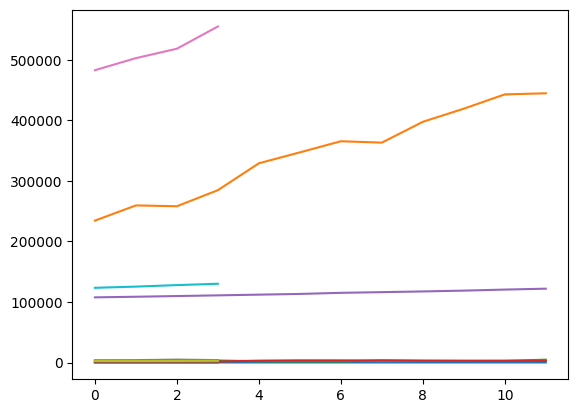

In [75]:
from matplotlib import pyplot as plt

# plt.plot(x_data.to_numpy())
# plt.plot(model.predict(x_test))
plt.plot(x_data.to_numpy())
# plt.plot(x_test.to_numpy())
plt.show()